<a href="https://colab.research.google.com/github/harita-gr/AI_ML_Practice/blob/main/ICT_AI_ML_LS_6_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/churn-data-v2.csv")

In [ ]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


churn - target column

In [ ]:
data.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [ ]:
data.shape

(14999, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,satisfaction,evaluation,average_montly_hours
count,14990.000000,14936.000000,14973.000000
mean,0.612817,716.085297,201.050424
std,0.248704,171.529563,49.986445
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


## Finding Missing Values

In [ ]:
data.isna().sum()

satisfaction             9
evaluation              63
number_of_projects      44
average_montly_hours    26
time_spend_company       0
work_accident            0
churn                    0
promotion                0
department              41
salary                   0
dtype: int64

In [ ]:
data.isnull().sum()

satisfaction             9
evaluation              63
number_of_projects      44
average_montly_hours    26
time_spend_company       0
work_accident            0
churn                    0
promotion                0
department              41
salary                   0
dtype: int64

Find % of missing values

In [ ]:
data.isna().sum()/len(data)*100

satisfaction            0.060004
evaluation              0.420028
number_of_projects      0.293353
average_montly_hours    0.173345
time_spend_company      0.000000
work_accident           0.000000
churn                   0.000000
promotion               0.000000
department              0.273352
salary                  0.000000
dtype: float64

Missing value% is very low. So cannot drop any columns

For numerical value - use mean/median to fill empty column

For categorical value - use mode

In [5]:
#handling categorical columns

data['number_of_projects'].unique()

array(['two', 'five', 'seven', 'six', 'four', 'three', nan], dtype=object)

In [6]:
# finding mode
data['number_of_projects'].value_counts()

four     4321
three    4055
five     2761
two      2388
six      1174
seven     256
Name: number_of_projects, dtype: int64

Mode = four

In [7]:
mode = data['number_of_projects'].mode()[0]

#mode()[0] => to select first mode value in multi-modal data

In [8]:
data['number_of_projects'] = data['number_of_projects'].fillna(mode)

In [ ]:
data.isnull().sum()

satisfaction             9
evaluation              63
number_of_projects       0
average_montly_hours    26
time_spend_company       0
work_accident            0
churn                    0
promotion                0
department              41
salary                   0
dtype: int64

In [9]:
mode = data['department'].mode()[0]
data['department'] = data['department'].fillna(mode)

In [ ]:
data.isnull().sum()

satisfaction             9
evaluation              63
number_of_projects       0
average_montly_hours    26
time_spend_company       0
work_accident            0
churn                    0
promotion                0
department               0
salary                   0
dtype: int64

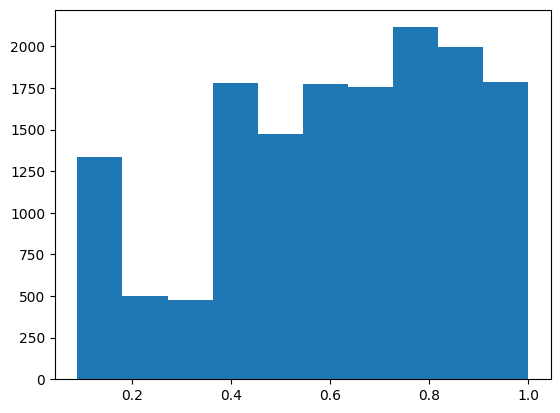

In [10]:
#handling numerical columns

#check if distribution is normal or skew
plt.hist(data['satisfaction'])
plt.show()

Negatively Skewed => Use Median

In [11]:
median_satisfaction = data['satisfaction'].median()
data['satisfaction'] = data['satisfaction'].fillna(median_satisfaction)

In [ ]:
data.isnull().sum()

satisfaction             0
evaluation              63
number_of_projects       0
average_montly_hours    26
time_spend_company       0
work_accident            0
churn                    0
promotion                0
department               0
salary                   0
dtype: int64

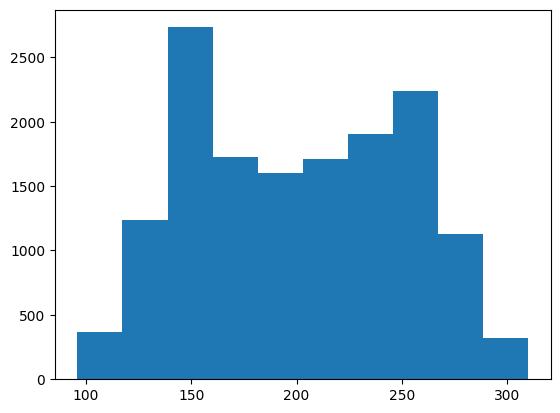

In [ ]:
plt.hist(data['average_montly_hours'])
plt.show()

Normal Distribution => use Mean

In [12]:
mean_average_montly_hours = data['average_montly_hours'].mean()
data['average_montly_hours'] = data['average_montly_hours'].fillna(mean_average_montly_hours)

In [ ]:
data.isnull().sum()

satisfaction             0
evaluation              63
number_of_projects       0
average_montly_hours     0
time_spend_company       0
work_accident            0
churn                    0
promotion                0
department               0
salary                   0
dtype: int64

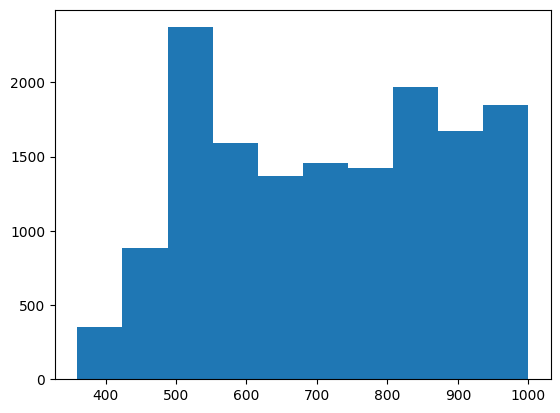

In [13]:
plt.hist(data['evaluation'])
plt.show()

In [14]:
median_evaluation = data['evaluation'].median()
data['evaluation'] = data['evaluation'].fillna(median_evaluation)

In [ ]:
data.isnull().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

## Outlier Analysis

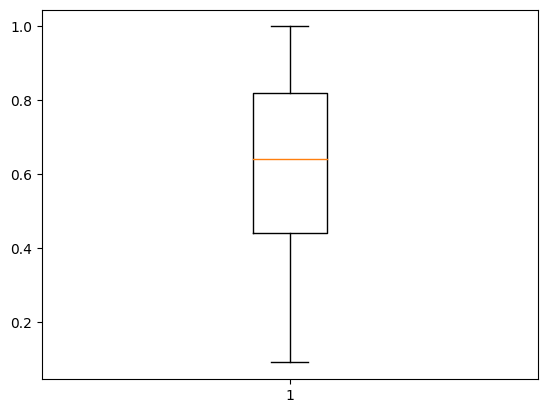

In [15]:
plt.boxplot(data['satisfaction'])
plt.show()

## Encoding

In [16]:
# 1. number_of_projects
data['number_of_projects'].unique()

array(['two', 'five', 'seven', 'six', 'four', 'three'], dtype=object)

In [17]:
#mapping ordinal values
dict1 = {'two':2, 'five':5, 'seven':7, 'four':4, 'three':3}

#Note: map isused instead of label encoding because it is better to give "two=2, six=6 etc.". label encoding will give integer in asc order

In [18]:
data['number_of_projects'] = data['number_of_projects'].map(dict1)

In [ ]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,2.0,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,5.0,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,7.0,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,5.0,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,2.0,159.0,3+,no,yes,no,sales,low


In [19]:
# 2. time_spend_company => strip off the + and it becomes a numerical value

data['time_spend_company'] = data['time_spend_company'].str.strip('+') # still object

data['time_spend_company'] = data['time_spend_company'].astype('int32')

data.dtypes

satisfaction            float64
evaluation              float64
number_of_projects      float64
average_montly_hours    float64
time_spend_company        int32
work_accident            object
churn                    object
promotion                object
department               object
salary                   object
dtype: object

In [20]:
# 3. churn => target col
data['churn'].unique()

array(['yes', 'no'], dtype=object)

Defining feature & target

In [21]:
#independent features
x = data.drop('churn', axis=1) #axis=1 means y-axis/columns

In [22]:
#target
y = data['churn']

In [23]:
# 4. work_accident => label encoding
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
x['work_accident'] = le.fit_transform(x['work_accident'])

In [26]:
x.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
0,0.38,530.0,2.0,157.0,3,0,no,sales,low
1,0.80,860.0,5.0,262.0,6,0,no,sales,medium
2,0.11,880.0,7.0,272.0,4,0,no,sales,medium
3,0.72,870.0,5.0,223.0,5,0,no,sales,low
4,0.37,520.0,2.0,159.0,3,0,no,sales,low


In [27]:
#5. one-hot encoding for all categorical values -> department,salary

x = pd.get_dummies(x)
x.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion_no,promotion_yes,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,530.0,2.0,157.0,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,860.0,5.0,262.0,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,880.0,7.0,272.0,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,870.0,5.0,223.0,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,520.0,2.0,159.0,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
x.shape

(14999, 26)

In [28]:
#6. target col => label encoding ALWAYS

y = le.fit_transform(y)

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

## Feature Scaling

Min Max Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [31]:
x.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_no', 'promotion_yes', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

Scale only non-encoded columns =>
'satisfaction',
 'evaluation',
 'number_of_projects',
'average_montly_hours',
'time_spend_company',



In [32]:
x.loc[:,['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company']] = min_max.fit_transform(x[['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company']])

In [33]:
x.head()
#values are in the range 0 to 1 now.

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion_no,promotion_yes,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
